In [1]:
import numpy as np
import scipy.interpolate as ip
import matplotlib.pyplot as plt

# Paramaterised proton/neutron coefficients

Sp_129_min_paper = np.array([0.00196369,-0.00119154,-0.0032421,0.00622602,-0.00496653,0.00224469,-0.000574412,0.0000831313,-0.00000641114,0.000000207744])
Sp_129_max_paper = np.array([0.00715281,-0.013479,0.00788823,0.00311153,-0.00653771,0.00375478,-0.00105558,0.00015944,-0.0000125055,0.000000404987])

Sn_129_min_paper = np.array([0.146535,-0.40929,0.521423,-0.374011,0.162155,-0.0424842,0.00674911,-0.000633434,0.0000320266,-0.000000654245])
Sn_129_max_paper = np.array([0.179056,-0.508334,0.65756,-0.477988,0.209437,-0.0554186,0.00889251,-0.000842977,0.0000430517,-0.000000888774])

Sp_131_min_paper = np.array([0.00159352,-0.00207344,0.00567412,-0.00605643,0.00337794,-0.000688135,-0.0000342717,0.0000313222,-0.00000402617,0.000000172711])
Sp_131_max_paper = np.array([0.00529643,-0.00528808,-0.00627452,0.0227436,-0.0192229,0.00844826,-0.00212755,0.000303972,-0.0000227893,0.000000705661])

Sn_131_min_paper = np.array([0.111627,-0.308602,0.474842,-0.375201,0.182382,-0.0539711,0.0094418,-0.000934456,0.0000473386,-0.000000901514])
Sn_131_max_paper = np.array([0.136735,-0.39393,0.617924,-0.488443,0.234645,-0.0681357,0.0116393,-0.00111487,0.0000534878,-0.000000903594])

In [2]:
# READ DATA
folder_path = '/Users/Robert/digitised_data/'

file_names_129 = ['129_p_min.csv','129_p_max.csv','129_n_min.csv','129_n_max.csv']
file_names_131 = ['131_p_min.csv','131_p_max.csv','131_n_min.csv','131_n_max.csv']

up_129_min, Sp_129_min = np.loadtxt(folder_path+file_names_129[0],dtype='double,double',delimiter=',',usecols=(0,1),unpack=True)
up_129_max, Sp_129_max = np.loadtxt(folder_path+file_names_129[1],dtype='double,double',delimiter=',',usecols=(0,1),unpack=True)
un_129_min, Sn_129_min = np.loadtxt(folder_path+file_names_129[2],dtype='double,double',delimiter=',',usecols=(0,1),unpack=True)
un_129_max, Sn_129_max = np.loadtxt(folder_path+file_names_129[3],dtype='double,double',delimiter=',',usecols=(0,1),unpack=True)

up_131_min, Sp_131_min = np.loadtxt(folder_path+file_names_131[0],dtype='double,double',delimiter=',',usecols=(0,1),unpack=True)
up_131_max, Sp_131_max = np.loadtxt(folder_path+file_names_131[1],dtype='double,double',delimiter=',',usecols=(0,1),unpack=True)
un_131_min, Sn_131_min = np.loadtxt(folder_path+file_names_131[2],dtype='double,double',delimiter=',',usecols=(0,1),unpack=True)
un_131_max, Sn_131_max = np.loadtxt(folder_path+file_names_131[3],dtype='double,double',delimiter=',',usecols=(0,1),unpack=True)

Sp_129_min_data = zip(up_129_min, Sp_129_min)
Sp_129_min_data = np.array(sorted(Sp_129_min_data, key=lambda x:x[0])) #sort the arrays by first column
Sp_129_max_data = zip(up_129_max, Sp_129_max)
Sp_129_max_data = np.array(sorted(Sp_129_max_data, key=lambda x:x[0]))
Sn_129_min_data = zip(un_129_min, Sn_129_min)
Sn_129_min_data = np.array(sorted(Sn_129_min_data, key=lambda x:x[0]))
Sn_129_max_data = zip(un_129_max, Sn_129_max)
Sn_129_max_data = np.array(sorted(Sn_129_max_data, key=lambda x:x[0]))

Sp_131_min_data = zip(up_131_min, Sp_131_min)
Sp_131_min_data = np.array(sorted(Sp_131_min_data, key=lambda x:x[0])) #sort the arrays by first column
Sp_131_max_data = zip(up_131_max, Sp_131_max)
Sp_131_max_data = np.array(sorted(Sp_131_max_data, key=lambda x:x[0]))
Sn_131_min_data = zip(un_131_min, Sn_131_min)
Sn_131_min_data = np.array(sorted(Sn_131_min_data, key=lambda x:x[0]))
Sn_131_max_data = zip(un_131_max, Sn_131_max)
Sn_131_max_data = np.array(sorted(Sn_131_max_data, key=lambda x:x[0]))

In [3]:
umin = 0.1
umax = 9.9

u_eval = np.arange(umin,umax,0.1)

In [4]:
# Polynomial definition

def S_Function(u, par):
    poly = 0
    parlength = len(par)
    for index in range(parlength):
        poly = poly + np.exp(-u) * par[index] * pow(u, index)
    return poly

In [5]:
# CREATE INTERPOLATED MEAN FUNCTION
Sfn_p_129_min_data = ip.interp1d(Sp_129_min_data[:,0],Sp_129_min_data[:,1],kind='cubic')
Sfn_p_129_max_data = ip.interp1d(Sp_129_max_data[:,0],Sp_129_max_data[:,1],kind='cubic')
Sfn_n_129_min_data = ip.interp1d(Sn_129_min_data[:,0],Sn_129_min_data[:,1],kind='cubic')
Sfn_n_129_max_data = ip.interp1d(Sn_129_max_data[:,0],Sn_129_max_data[:,1],kind='cubic')

Sfn_p_131_min_data = ip.interp1d(Sp_131_min_data[:,0],Sp_131_min_data[:,1],kind='cubic')
Sfn_p_131_max_data = ip.interp1d(Sp_131_max_data[:,0],Sp_131_max_data[:,1],kind='cubic')
Sfn_n_131_min_data = ip.interp1d(Sn_131_min_data[:,0],Sn_131_min_data[:,1],kind='cubic')
Sfn_n_131_max_data = ip.interp1d(Sn_131_max_data[:,0],Sn_131_max_data[:,1],kind='cubic')

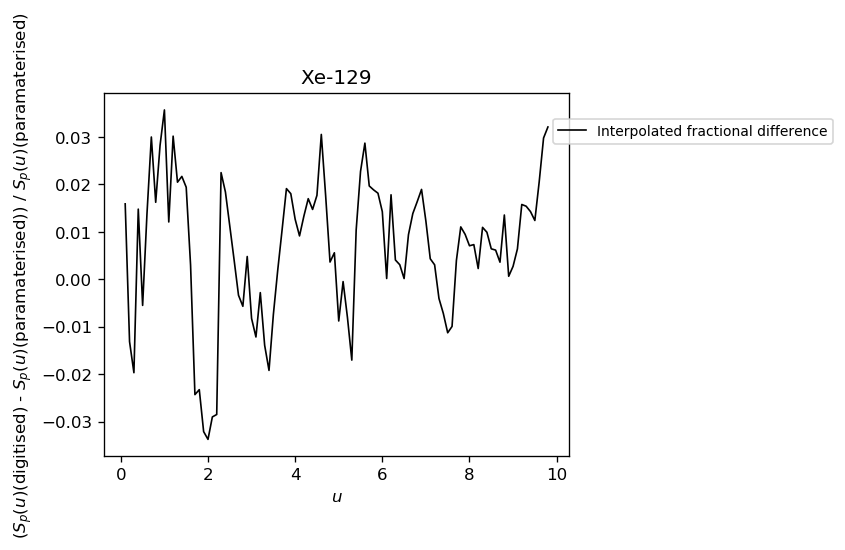

In [6]:
# Evaluate function for proton/neutron case using polynomial paramaterisation

Sfn_p_129_min_paper = S_Function(u_eval, Sp_129_min_paper)
Sfn_p_129_max_paper = S_Function(u_eval, Sp_129_max_paper)
Sfn_p_129_interp_paper = 0.5 * (Sfn_p_129_min_paper + Sfn_p_129_max_paper)

# Evaluate function for proton/neutron case using digitised plot data

Sfn_p_129_interp_data = 0.5 * (Sfn_p_129_min_data(u_eval) + Sfn_p_129_max_data(u_eval))

frac_diff = (Sfn_p_129_interp_data - Sfn_p_129_interp_paper)/Sfn_p_129_interp_paper

fig1 = plt.figure(dpi=120,figsize=(5,4))
plt.xlabel('$u$')
plt.ylabel('($S_{p}(u)$(digitised) - $S_{p}(u)$(paramaterised)) / $S_{p}(u)$(paramaterised)')
plt.title('Xe-129')

plt.plot(u_eval, frac_diff, '-k', lw=1, label='Interpolated fractional difference')

plt.legend(bbox_to_anchor=(0.95, 0.95), fontsize='small')

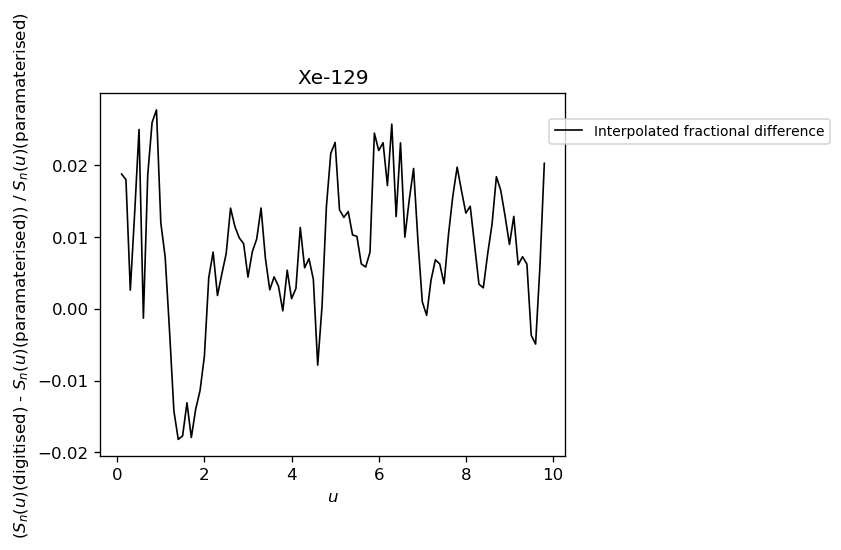

In [7]:
Sfn_n_129_min_paper = S_Function(u_eval, Sn_129_min_paper)
Sfn_n_129_max_paper = S_Function(u_eval, Sn_129_max_paper)
Sfn_n_129_interp_paper = 0.5 * (Sfn_n_129_min_paper + Sfn_n_129_max_paper)

Sfn_n_129_interp_data = 0.5 * (Sfn_n_129_min_data(u_eval) + Sfn_n_129_max_data(u_eval))

frac_diff = (Sfn_n_129_interp_data - Sfn_n_129_interp_paper)/Sfn_n_129_interp_paper

fig2 = plt.figure(dpi=120,figsize=(5,4))
plt.xlabel('$u$')
plt.ylabel('($S_{n}(u)$(digitised) - $S_{n}(u)$(paramaterised)) / $S_{n}(u)$(paramaterised)')
plt.title('Xe-129')

plt.plot(u_eval, frac_diff, '-k', lw=1, label='Interpolated fractional difference')

plt.legend(bbox_to_anchor=(0.95, 0.95), fontsize='small')

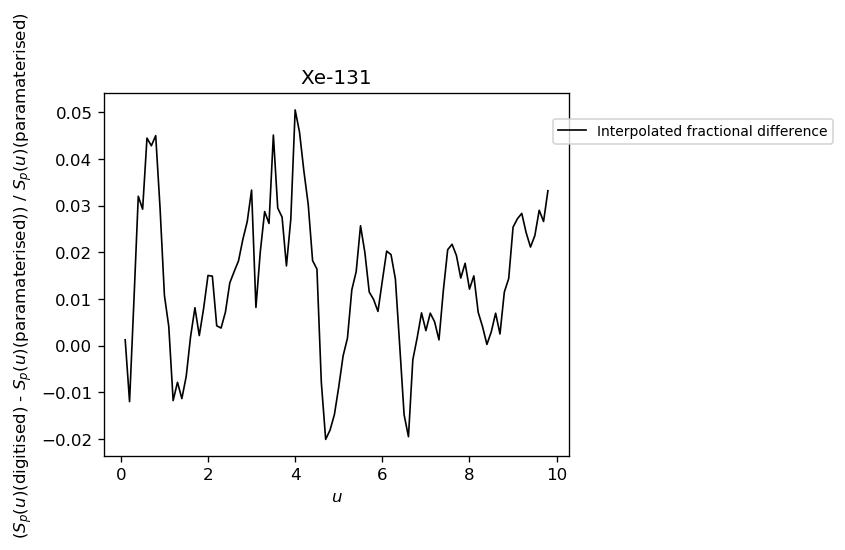

In [8]:
Sfn_p_131_min_paper = S_Function(u_eval, Sp_131_min_paper)
Sfn_p_131_max_paper = S_Function(u_eval, Sp_131_max_paper)
Sfn_p_131_interp_paper = 0.5 * (Sfn_p_131_min_paper + Sfn_p_131_max_paper)

Sfn_p_131_interp_data = 0.5 * (Sfn_p_131_min_data(u_eval) + Sfn_p_131_max_data(u_eval))

frac_diff = (Sfn_p_131_interp_data - Sfn_p_131_interp_paper)/Sfn_p_131_interp_paper

fig3 = plt.figure(dpi=120,figsize=(5,4))
plt.xlabel('$u$')
plt.ylabel('($S_{p}(u)$(digitised) - $S_{p}(u)$(paramaterised)) / $S_{p}(u)$(paramaterised)')
plt.title('Xe-131')

plt.plot(u_eval, frac_diff, '-k', lw=1, label='Interpolated fractional difference')

plt.legend(bbox_to_anchor=(0.95, 0.95), fontsize='small')

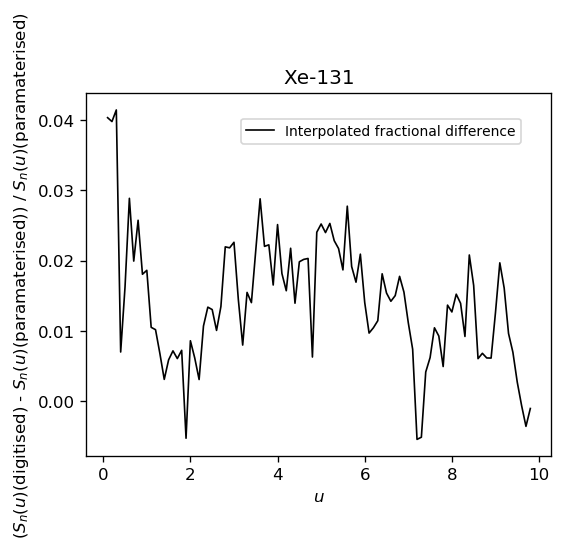

In [9]:
Sfn_n_131_min_paper = S_Function(u_eval, Sn_131_min_paper)
Sfn_n_131_max_paper = S_Function(u_eval, Sn_131_max_paper)
Sfn_n_131_interp_paper = 0.5 * (Sfn_n_131_min_paper + Sfn_n_131_max_paper)

Sfn_n_131_interp_data = 0.5 * (Sfn_n_131_min_data(u_eval) + Sfn_n_131_max_data(u_eval))

frac_diff = (Sfn_n_131_interp_data - Sfn_n_131_interp_paper)/Sfn_n_131_interp_paper

fig4 = plt.figure(dpi=120,figsize=(5,4))
plt.xlabel('$u$')
plt.ylabel('($S_{n}(u)$(digitised) - $S_{n}(u)$(paramaterised)) / $S_{n}(u)$(paramaterised)')
plt.title('Xe-131')

plt.plot(u_eval, frac_diff, '-k', lw=1, label='Interpolated fractional difference')

plt.legend(bbox_to_anchor=(0.95, 0.95), fontsize='small')